In [8]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2024-12-28 12:12:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2024-12-28 12:12:23 (207 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv("cell_samples.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


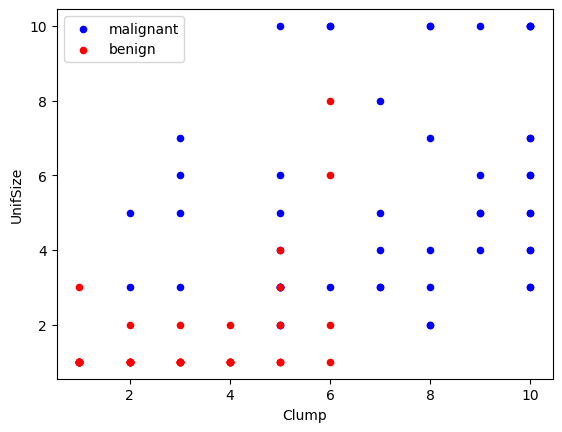

In [10]:
chart = data[data['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='malignant');
data[data['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='benign' , ax=chart);
plt.show()

In [11]:
data = data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int64')
data.dtypes


<ipython-input-11-72b417bbf169>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BareNuc'] = data['BareNuc'].astype('int64')


,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [12]:
from sklearn.model_selection import train_test_split
feature = ['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']
X = data[feature]
y = data['Class']
x_train , x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [13]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [ ]:
y_preds = model.predict(x_test)
print(y_preds)

[2 2 2 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 4 4
 2 2 2 2 4 4 2 2 4 2 4 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 4 2 2 4 2 4 4 2 2 4 2
 2 4 2 4 2 4 2 4 4 2 2 2 2 2 2 4 2 2 4 4 4 2 2 2 4 2 4 2 2 4 4 4 2 4 2 4 2
 2 4 2 4 4 2 4 4 2 4 2 4 2 4 4 4 2 2 4 4 2 2 2 2 2 2]


              precision    recall  f1-score   support

           2       1.00      0.98      0.99        84
           4       0.96      1.00      0.98        53

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



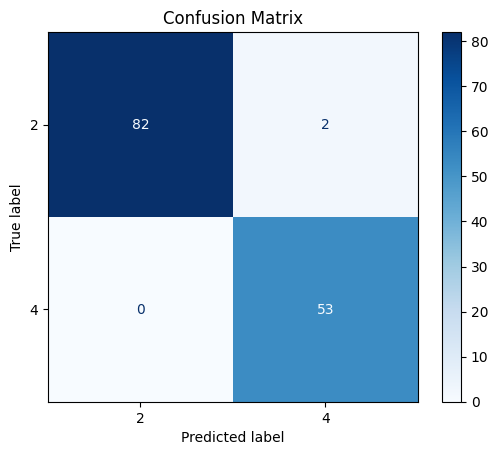

In [15]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, y_preds, labels=[2,4])
np.set_printoptions(precision=2)
cm = confusion_matrix(y_test,y_preds,labels=[2,4])
print (classification_report(y_test, y_preds))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 4])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# using linear Kernel
model = svm.SVC(kernel="linear")
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
cm = confusion_matrix(y_test,y_preds,labels=[2,4])
cfmat = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[2,4])
cfmat.plot(cmap='Blues')
plt.title("Confusion Matrix ")
plt.plot()
print(classification_report(y_test,y_preds))

NameError: name 'confusion_matrix' is not defined

# Support Vector Machine with Hyperparameter

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Classification Report :                precision    recall  f1-score   support

           2       0.99      0.96      0.98        84
           4       0.95      0.98      0.96        53

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



[]

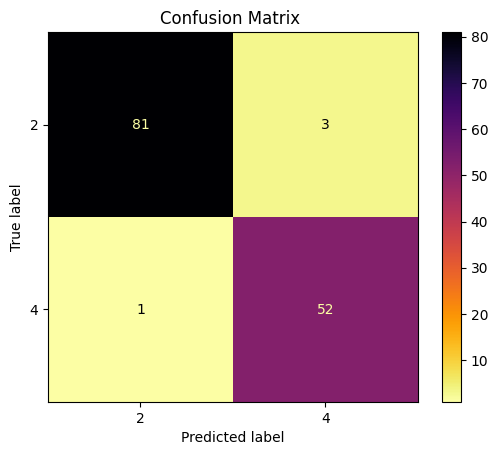

In [18]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'kernel' : ['linear','rbf','poly','sigmoid'],
    'C' : np.logspace(-3,3,5),
    'gamma' : np.logspace(-3,3,5)
}

model = svm.SVC()
grid_param = GridSearchCV(estimator=model,scoring='accuracy',cv=5,param_grid=parameters,n_jobs=-1,verbose=2)

grid_param.fit(x_train,y_train)
y_preds = grid_param.predict(x_test)

print("Classification Report : ",classification_report(y_test,y_preds))
cm = confusion_matrix(y_test,y_preds,labels=[2,4])
cfmat = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[2,4])
cfmat.plot(cmap='inferno_r')
plt.title("Confusion Matrix ")
plt.plot()